In [1]:
import os
import numpy as np
import soundfile as sf
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np


In [3]:
dataset_root = r"C:\Users\SURABHI\OneDrive\Desktop\cojag\archive (1)\Data\genres_original" 


In [65]:
def text_to_bits(text):
    bits = ''.join(format(ord(c), '08b') for c in text)
    bits += '1111111111111110'   
    return bits


In [7]:
def embed_lsb_int(audio_int, bits):
    stego = audio_int.copy()

    if len(bits) > len(stego):
        raise ValueError("Message too large for this audio file")

    for i, bit in enumerate(bits):
        stego[i] = (stego[i] & ~1) | int(bit)

    return stego


In [9]:
def mse(a, b):
    return np.mean((a - b) ** 2)

def rmse(a, b):
    return np.sqrt(mse(a, b))

def psnr(a, b):
    m = mse(a, b)
    if m == 0:
        return float("inf")
    return 10 * np.log10(1.0 / m)

def snr(a, b):
    noise = a - b
    signal_power = np.mean(a ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)


In [11]:
stego_dir = r"C:\Users\SURABHI\OneDrive\Desktop\cojag\stego audio"
os.makedirs(stego_dir, exist_ok=True)


In [13]:
results = []


In [49]:
while True:

    print("\n========= AUDIO STEGANOGRAPHY EXPERIMENT =========")

    genres = [g for g in os.listdir(dataset_root)
              if os.path.isdir(os.path.join(dataset_root, g))]

    for i, g in enumerate(genres):
        print(f"{i+1}. {g}")

    g_choice = int(input("\nSelect genre number: ")) - 1

    if g_choice < 0 or g_choice >= len(genres):
        print("Invalid genre selection.")
        continue

    selected_genre = genres[g_choice]
    genre_path = os.path.join(dataset_root, selected_genre)

    audio_files = [f for f in os.listdir(genre_path) if f.endswith(".wav")]

    print(f"\nAvailable audios in {selected_genre}:")

    for i, f in enumerate(audio_files):
        print(f"{i+1}. {f}")

    a_choice = int(input("\nSelect audio number: ")) - 1

    if a_choice < 0 or a_choice >= len(audio_files):
        print("Invalid audio selection.")
        continue

    selected_audio = audio_files[a_choice]
    original_path = os.path.join(genre_path, selected_audio)

    secret_message = input("\nEnter secret message: ")

    audio_int, sr = sf.read(original_path, dtype='int16')

    if len(audio_int.shape) == 2:
        audio_int = audio_int[:, 0]

    bits = text_to_bits(secret_message)
    stego_int = embed_lsb_int(audio_int, bits)

    stego_name = f"stego_{selected_genre}_{selected_audio}"
    stego_path = os.path.join(stego_dir, stego_name)

    sf.write(stego_path, stego_int, sr, subtype='PCM_16')

    orig_f = audio_int.astype(np.float32) / 32768
    stego_f = stego_int.astype(np.float32) / 32768

    mse_val = mse(orig_f, stego_f)
    rmse_val = rmse(orig_f, stego_f)
    psnr_val = psnr(orig_f, stego_f)
    snr_val = snr(orig_f, stego_f)

    results.append([
        selected_genre,
        selected_audio,
        stego_name,
        mse_val,
        rmse_val,
        psnr_val,
        snr_val
    ])

    print("\nStego saved at:", stego_path)
    print("MSE :", mse_val)
    print("RMSE:", rmse_val)
    print("PSNR:", psnr_val, "dB")
    print("SNR :", snr_val, "dB")

    choice = input("\nDo you want to test another audio? (y/n): ").lower()
    if choice != 'y':
        break



========= AUDIO STEGANOGRAPHY EXPERIMENT =========
1. blues
2. classical
3. country
4. disco
5. hiphop
6. jazz
7. metal
8. pop
9. reggae
10. rock



Select genre number:  5



Available audios in hiphop:
1. hiphop.00000.wav
2. hiphop.00001.wav
3. hiphop.00002.wav
4. hiphop.00003.wav
5. hiphop.00004.wav
6. hiphop.00005.wav
7. hiphop.00006.wav
8. hiphop.00007.wav
9. hiphop.00008.wav
10. hiphop.00009.wav
11. hiphop.00010.wav
12. hiphop.00011.wav
13. hiphop.00012.wav
14. hiphop.00013.wav
15. hiphop.00014.wav
16. hiphop.00015.wav
17. hiphop.00016.wav
18. hiphop.00017.wav
19. hiphop.00018.wav
20. hiphop.00019.wav
21. hiphop.00020.wav
22. hiphop.00021.wav
23. hiphop.00022.wav
24. hiphop.00023.wav
25. hiphop.00024.wav
26. hiphop.00025.wav
27. hiphop.00026.wav
28. hiphop.00027.wav
29. hiphop.00028.wav
30. hiphop.00029.wav
31. hiphop.00030.wav
32. hiphop.00031.wav
33. hiphop.00032.wav
34. hiphop.00033.wav
35. hiphop.00034.wav
36. hiphop.00035.wav
37. hiphop.00036.wav
38. hiphop.00037.wav
39. hiphop.00038.wav
40. hiphop.00039.wav
41. hiphop.00040.wav
42. hiphop.00041.wav
43. hiphop.00042.wav
44. hiphop.00043.wav
45. hiphop.00044.wav
46. hiphop.00045.wav
47. hiphop.000


Select audio number:  22

Enter secret message:  this is secret message



Stego saved at: C:\Users\SURABHI\OneDrive\Desktop\cojag\stego audio\stego_hiphop_hiphop.00021.wav
MSE : 1.2383973e-13
RMSE: 3.5190868e-07
PSNR: 129.07140014070063 dB
SNR : 117.12605476379395 dB



Do you want to test another audio? (y/n):  n


In [51]:
df = pd.DataFrame(results, columns=[
    "Genre",
    "Original Audio",
    "Stego Audio",
    "MSE",
    "RMSE",
    "PSNR (dB)",
    "SNR (dB)"
])

print("\n========= FINAL RESULT TABLE =========")
print(df)

df.to_csv("audio_stego_results.csv", index=False)
print("\nSaved as audio_stego_results.csv")



========= FINAL RESULT TABLE =========
       Genre       Original Audio                          Stego Audio  \
0  classical  classical.00044.wav  stego_classical_classical.00044.wav   
1      metal      metal.00014.wav          stego_metal_metal.00014.wav   
2     hiphop     hiphop.00021.wav        stego_hiphop_hiphop.00021.wav   

            MSE          RMSE   PSNR (dB)    SNR (dB)  
0  1.224325e-13  3.499035e-07  129.121034   94.757156  
1  2.534196e-14  1.591916e-07  135.961599  113.923330  
2  1.238397e-13  3.519087e-07  129.071400  117.126055  

Saved as audio_stego_results.csv


In [53]:
print("\n======= RESULT TABLE =======")
print(df.reset_index())



======= RESULT TABLE =======
   index      Genre       Original Audio                          Stego Audio  \
0      0  classical  classical.00044.wav  stego_classical_classical.00044.wav   
1      1      metal      metal.00014.wav          stego_metal_metal.00014.wav   
2      2     hiphop     hiphop.00021.wav        stego_hiphop_hiphop.00021.wav   

            MSE          RMSE   PSNR (dB)    SNR (dB)  
0  1.224325e-13  3.499035e-07  129.121034   94.757156  
1  2.534196e-14  1.591916e-07  135.961599  113.923330  
2  1.238397e-13  3.519087e-07  129.071400  117.126055  


In [55]:
idx = int(input("\nEnter index number for graphical comparison: "))

if idx < 0 or idx >= len(df):
    print("Invalid index")
else:
    row = df.iloc[idx]



Enter index number for graphical comparison:  2


In [57]:
original_audio_path = os.path.join(
    dataset_root,
    row["Genre"],
    row["Original Audio"]
)

stego_audio_path = os.path.join(stego_dir, row["Stego Audio"])


In [59]:
orig, sr1 = sf.read(original_audio_path, dtype='int16')
stego, sr2 = sf.read(stego_audio_path, dtype='int16')

if len(orig.shape) == 2:
    orig = orig[:, 0]

if len(stego.shape) == 2:
    stego = stego[:, 0]


In [61]:
orig_f = orig.astype(np.float32) / 32768
stego_f = stego.astype(np.float32) / 32768

L = min(len(orig_f), len(stego_f))
orig_f = orig_f[:L]
stego_f = stego_f[:L]


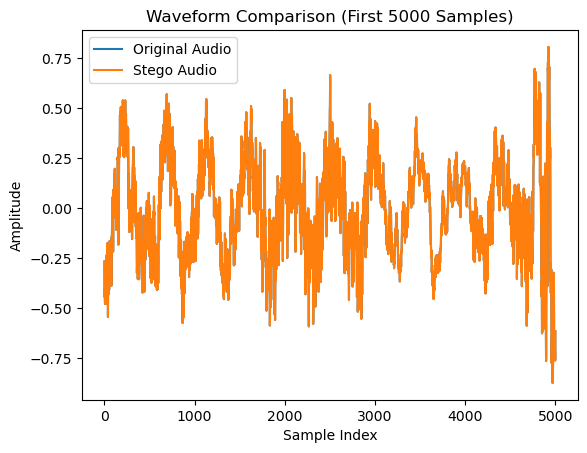

In [63]:
plt.figure()
plt.plot(orig_f[:5000], label="Original Audio")
plt.plot(stego_f[:5000], label="Stego Audio")
plt.title("Waveform Comparison (First 5000 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
